## Data types

### Quantitative
- **Continuous**: Height, Age, Income
- **Discrete**: Pages in a Book, Trees in Yard, Dogs at a Coffee Shop

### Categorical
- **Ordinal**: Letter Grade, Survey Rating
- **Nominal**: Gender, Marital Status, Breakfast Items



## Bar Charts
A bar chart is used to depict the distribution of a categorical variable.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Barplot

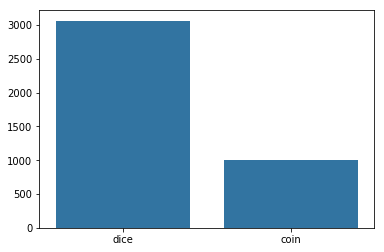

In [35]:
throws_df = pd.DataFrame({"dice" : pd.Series(data=np.random.randint(1,6,1000)),
                          "coin" : pd.Series(data=np.random.randint(1,2,1000))})

na_counts = throws_df.sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)

### Countplot

In [37]:
throws_df = pd.DataFrame({"throw" : pd.Series(data=np.random.randint(1,6,1000))})

In [ ]:
# If your data is in a pandas Series, 1-d NumPy array, or list
sb.countplot(np.random.randint(1,6,1000))

In [ ]:
# draw a bar chart showing the count of each number
sb.countplot(data=throws_df, x = 'throw')

In [ ]:
# single color from palette
base_color = sb.color_palette()[0]
sb.countplot(data = throws_df, x = 'throw', color = base_color)

In [ ]:
# order by count
base_color = sb.color_palette()[0]
cat_order = throws_df['throw'].value_counts().index
sb.countplot(data = throws_df, x = 'throw', color = base_color, order = cat_order)

In [ ]:
# convert data into ordered type

# this method requires pandas v0.21 or later
level_order = [5, 4, 3, 2, 1]
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
throws_df['throw'] = throws_df['throw'].astype(ordered_cat)

base_color = sb.color_palette()[0]
sb.countplot(data = throws_df, x = 'throw', color = base_color) 

In [ ]:
# horizontal bar chart
base_color = sb.color_palette()[0]
sb.countplot(data = throws_df, y = 'throw', color = base_color)

In [ ]:
# change orientation of labels
base_color = sb.color_palette()[0]
sb.countplot(data = throws_df, x = 'throw', color = base_color)
plt.xticks(rotation = 90)

### Absolute vs. Relative Frequency

In [ ]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = throws_df.shape[0] # 1000
max_count = throws_df['throw'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = throws_df, x = 'throw', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

#### Additional Variation

0
1
2
3
4


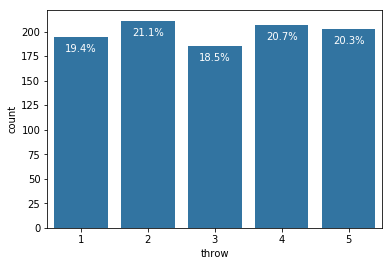

In [38]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = throws_df, x = 'throw', color = base_color)

# add annotations
n_points = throws_df.shape[0]
cat_counts = throws_df['throw'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-15, pct_string, ha = 'center', color = 'w')
    
    print(loc)

## Pie Charts

(-1.1229343149730908,
 1.1253692289808364,
 -1.119637517376594,
 1.1286660265773332)

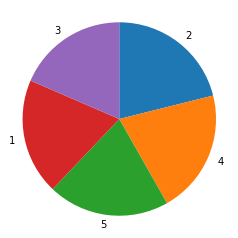

In [39]:
sorted_counts = throws_df['throw'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')

### Donut plot

(-1.1229343149730908,
 1.1253692289808364,
 -1.119637517376594,
 1.1286660265773332)

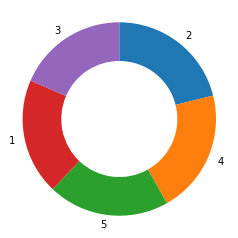

In [43]:
sorted_counts = throws_df['throw'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')